# Data Analysis
##### Analyzing the Pre-Processed Binary Encoded Data

Using standard python and pandas methods to examine and analyze the dataset

#### Imports

In [85]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
import pre_processing as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
def correlation_analysis(
    df: pd.DataFrame,
    method: str = "pearson",
    target: str | None = None,
    threshold: float | None = None,
    figsize: tuple = (10, 8),
    annot: bool = False,
    cmap: str = "coolwarm"
) -> pd.DataFrame:
    """
    Perform correlation analysis and visualization.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe
    method : str
        Correlation method: 'pearson', 'spearman', or 'kendall'
    target : str | None
        If provided, plots correlation of all features vs target
    threshold : float | None
        If set, only correlations with |corr| >= threshold are colored
    figsize : tuple
        Figure size for plots
    annot : bool
        Whether to annotate heatmap values
    cmap : str
        Colormap for heatmap

    Returns
    -------
    pd.DataFrame
        Correlation matrix
    """

    numeric_df = df.select_dtypes(include="number")

    if numeric_df.empty:
        raise ValueError("No numeric columns available for correlation analysis.")

    corr_matrix = numeric_df.corr(method=method)

    # ---- Threshold masking ----
    if threshold is not None:
        mask = np.abs(corr_matrix) < threshold
    else:
        mask = None

    # ---- Heatmap ----
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        mask=mask,
        cmap=cmap,
        annot=annot,
        fmt=".2f",
        square=True,
        cbar_kws={"shrink": 0.8},
        linewidths=0.5,
        linecolor="lightgray"
    )
    plt.title(
        f"{method.capitalize()} Correlation Heatmap"
        + (f" (|corr| ≥ {threshold})" if threshold is not None else "")
    )
    plt.tight_layout()
    plt.show()

    # ---- Target correlation bar plot ----
    if target is not None:
        if target not in corr_matrix.columns:
            raise ValueError(f"Target '{target}' not found or not numeric.")

        target_corr = (
            corr_matrix[target]
            .drop(target)
            .sort_values(key=abs, ascending=False)
        )

        if threshold is not None:
            target_corr = target_corr[abs(target_corr) >= threshold]

        plt.figure(figsize=(figsize[0], figsize[1] * 0.6))
        target_corr.plot(kind="bar")
        plt.axhline(0)
        plt.ylabel("Correlation")
        plt.title(f"Feature Correlation with '{target}'")
        plt.tight_layout()
        plt.show()

    return corr_matrix

In [87]:
df = pp.preprocess_pipeline(r"Updated_Gaming_Survey_Responses.xlsx")

[INFO] Excel dataset loaded successfully. Shape: (500, 22)
[INFO] Basic cleaning applied.
[INFO] 'timestamp' column removed.
[INFO] Age column converted to binary columns -> Age_Teen, Age_Young_Adult, Age_Adult, Age_Mid_Adult.
[INFO] Location column converted to binary columns -> 'Location_India', 'Location_US', 'Location_Other'.
[INFO] Gender column cleaned.
[INFO] Gender column converted to binary columns.
[INFO] 'How often do you play video games?' converted to binary columns -> Gaming_Daily, Gaming_Weekly, Gaming_Monthly, Gaming_Rarely_Never.
[INFO] 'How many hours do you typically spend gaming in a week?' column cleaned and renamed -> 'Gaming_Hours'.
[INFO] 'Gaming_Hours' converted to binary columns.
[INFO] 'Which device do you play games on the most?(Check all that apply)' column cleaned and expanded into one-hot device columns.
[INFO] 'What genres of video games do you play? (Check all that apply)' column cleaned and expanded into one-hot genre columns.
[INFO] 'What is your favo

In [88]:
df.to_csv('data/processed_data.csv', index=True)

In [89]:
def dataframe_to_png(
    df,
    output_path="table.png",
    figsize=(10, 4),
    font_size=12,
    show=True,
    include_index=False
):
    if include_index:
        df = df.reset_index()

    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        loc='center',
        cellLoc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    table.scale(1, 1.5)

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')

    if show:
        plt.show()

    plt.close(fig)

#### Data Loading

In [90]:
# Replace with the actual path to your CSV
df = pd.read_csv(r"data/processed_data.csv")

# Show data as boolean values
# df = df.astype(bool)

print("Dataset shape:", df.shape)
print("Sample transactions:")

print("data columns: ", df.columns.tolist())

df.head()
df.drop(columns=['Unnamed: 0'], inplace=True)

Dataset shape: (500, 67)
Sample transactions:
data columns:  ['Unnamed: 0', 'Age_Teen', 'Age_Young_Adult', 'Age_Adult', 'Age_Mid_Adult', 'Location_India', 'Location_US', 'Location_Other', 'Gender_Female', 'Gender_Male', 'Gaming_Daily', 'Gaming_Weekly', 'Gaming_Monthly', 'Gaming_Rarely_Never', 'Gaming_Hours_0-1_hour', 'Gaming_Hours_1-5_hours', 'Gaming_Hours_5-10_hours', 'Gaming_Hours_10-20_hours', 'Gaming_Hours_20plus_hours', 'Device_PC', 'Device_Mobile', 'Device_Console', 'Device_Handheld', 'Device_Tablet', 'Genre_Action/Adventure', 'Genre_FPS', 'Genre_RPG', 'Genre_Puzzle/Strategy', 'Genre_Simulation', 'Genre_MMO', 'Genre_Sports', 'Favorite_Game_bgmi', 'Favorite_Game_call_of_duty', 'Favorite_Game_chess', 'Favorite_Game_clash_of_clans', 'Favorite_Game_efootball', 'Favorite_Game_fc_mobile', 'Favorite_Game_fortnite', 'Favorite_Game_free_fire', 'Favorite_Game_god_of_war_ragnarok', 'Favorite_Game_moba_legends', 'Favorite_Game_red_dead_redemption_2', 'Favorite_Game_rhythm_rush_lite', 'Favori

In [91]:
def get_transaction(df, row_idx):
    return df.columns[df.iloc[row_idx] == 1].tolist()

### Item Categories

In [ ]:
item_groups = {
    "Gender" : ['Gender_Male', 'Gender_Female'],
    "Age" : ['Age_Teen', 'Age_Young_Adult', 'Age_Adult', 'Age_Mid_Adult'],
    "Location" : ['Location_India', 'Location_US', 'Location_Other'],
    "Frequency" : ['Gaming_Daily', 'Gaming_Weekly', 'Gaming_Monthly', 'Gaming_Rarely_Never'],
    "Hours" : ['Gaming_Hours_0-1_hour', 'Gaming_Hours_1-5_hours', 'Gaming_Hours_5-10_hours', 'Gaming_Hours_10-20_hours', 'Gaming_Hours_20plus_hours'],
    "Device" : ['Device_PC', 'Device_Mobile', 'Device_Console', 'Device_Handheld', 'Device_Tablet'],
    "Genre" : ['Genre_Action/Adventure', 'Genre_FPS', 'Genre_RPG', 'Genre_Puzzle/Strategy', 'Genre_Simulation', 'Genre_MMO', 'Genre_Sports'],
    "Favorite" : ['Favorite_Game_bgmi', 'Favorite_Game_call_of_duty', 'Favorite_Game_chess', 'Favorite_Game_clash_of_clans', 'Favorite_Game_efootball', 'Favorite_Game_fc_mobile', 'Favorite_Game_fortnite', 'Favorite_Game_free_fire', 'Favorite_Game_god_of_war_ragnarok', 'Favorite_Game_moba_legends', 'Favorite_Game_red_dead_redemption_2', 'Favorite_Game_rhythm_rush_lite', 'Favorite_Game_solo_leveling', 'Favorite_Game_subway', 'Favorite_Game_wukong', 'Favorite_Game_wuthering_waves', 'Favorite_Game_unknown'],
    "Discovery" : ['Discovery_Social_Media', 'Discovery_Gaming_Forums', 'Discovery_Friends_Family', 'Discovery_Game_Reviews', 'Discovery_YouTube_Streaming', 'Discovery_Self_Search', 'Game_Mode_Single_Player'],
    "Game Mode" : ['Game_Mode_Single_Player', 'Game_Mode_Multiplayer', 'Game_Mode_Both'],
    "Spending" : ['Spend_lt100', 'Spend_100-500', 'Spend_500-1000', 'Spend_1000plus'],
    "Reason" : ['Reason_Fun', 'Reason_Stress_Relief', 'Reason_Skills_Competition', 'Reason_Socialize', 'Reason_Learning', 'Reason_Other']
}

mutually_exclusive_groups = ["Gender", "Age", "Location", "Frequency", "Hours", "Spending"]

#### Let:
- $ I = \{ i_1, i_2, ... , i_m \} $ be the set of all items
- $ D = \{ T_1, T_2, ... , T_N \} $ be the transaction database
- $ N = | D | $ be the number of transactions

## Analysis

### Item supports

$ \text{count}(i) = \sum _{t=1}^N 1(i \in T) $

$ \text{support}(i) = \frac{\text{count(i)}}{\text{N}} $

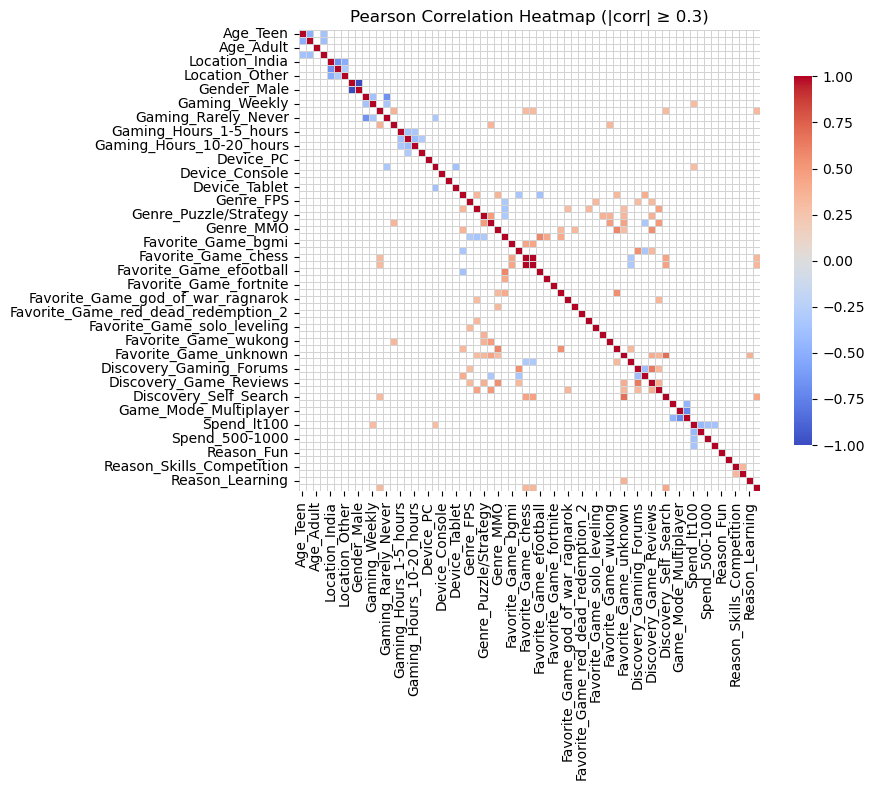

,Age_Teen,Age_Young_Adult,Age_Adult,Age_Mid_Adult,Location_India,Location_US,Location_Other,Gender_Female,Gender_Male,Gaming_Daily,...,Spend_lt100,Spend_100-500,Spend_500-1000,Spend_1000plus,Reason_Fun,Reason_Stress_Relief,Reason_Skills_Competition,Reason_Socialize,Reason_Learning,Reason_Other
Age_Teen,1.000000,-0.494384,-0.241389,-0.367282,0.105673,-0.146015,0.032678,0.088953,-0.088953,0.008338,...,-0.001754,-0.037811,0.036566,0.006766,-0.078048,0.013581,-0.095061,0.045591,-0.050369,-0.043879
Age_Young_Adult,-0.494384,1.000000,-0.258316,-0.393037,0.103699,-0.163307,0.054980,-0.006138,0.006138,-0.011201,...,-0.014225,0.062016,-0.037840,-0.012729,0.030676,0.013947,0.073120,0.050624,-0.004176,0.019964
Age_Adult,-0.241389,-0.258316,1.000000,-0.191905,-0.097586,0.145764,-0.042678,-0.025637,0.025637,-0.082392,...,0.009607,-0.030850,0.028538,-0.006780,0.048372,0.030895,-0.065074,-0.090497,0.068619,-0.025280
Age_Mid_Adult,-0.367282,-0.393037,-0.191905,1.000000,-0.161826,0.238140,-0.066677,-0.072568,0.072568,0.065598,...,0.010886,-0.005243,-0.019128,0.012068,0.015394,-0.054255,0.071573,-0.040019,0.008998,0.045132
Location_India,0.105673,0.103699,-0.097586,-0.161826,1.000000,-0.662219,-0.514308,0.088067,-0.088067,0.009993,...,-0.116153,0.011260,0.020036,0.110297,-0.017188,0.016696,0.040875,0.026731,-0.009426,-0.045807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reason_Stress_Relief,0.013581,0.013947,0.030895,-0.054255,0.016696,-0.026054,0.008578,0.068252,-0.068252,0.021509,...,-0.071426,0.096632,-0.008013,-0.011367,-0.020009,1.000000,-0.109407,0.046446,-0.165854,-0.186003
Reason_Skills_Competition,-0.095061,0.073120,-0.065074,0.071573,0.040875,0.007198,-0.060241,0.006156,-0.006156,-0.007126,...,-0.057414,0.119288,-0.030298,-0.031043,0.071886,-0.109407,1.000000,0.336980,0.180544,-0.152747
Reason_Socialize,0.045591,0.050624,-0.090497,-0.040019,0.026731,-0.014531,-0.017377,0.001073,-0.001073,0.050995,...,-0.183398,0.119411,0.110830,-0.020658,-0.046500,0.046446,0.336980,1.000000,-0.116082,-0.130185
Reason_Learning,-0.050369,-0.004176,0.068619,0.008998,-0.009426,0.018627,-0.009327,-0.011320,0.011320,0.105553,...,0.045029,-0.091019,-0.013068,0.059376,0.110551,-0.165854,0.180544,-0.116082,1.000000,-0.027578


In [93]:
correlations = correlation_analysis(df, threshold=0.30)
correlations

In [94]:
threshold = 0.3

filtered_corr = (
    correlations
    .stack()
    .reset_index()
    .rename(columns={
        "level_0": "item_1",
        "level_1": "item_2",
        0: "correlation"
    })
)

# remove self-correlations
filtered_corr = filtered_corr[
    filtered_corr["item_1"] != filtered_corr["item_2"]
]

# apply threshold
filtered_positive_corr = filtered_corr[
    filtered_corr["correlation"] > threshold
]
filtered_negative_corr = filtered_corr[
    filtered_corr["correlation"] < -threshold
]
filtered_positive_corr.sort_values(by="correlation", ascending=False)
filtered_negative_corr.sort_values(by="correlation", ascending=False)
print("Filtered Correlations shape: ", filtered_corr.shape)
print("Filtered Positive Correlations shape: ", filtered_positive_corr.shape)
print("Filtered Negative Correlations shape: ", filtered_negative_corr.shape)

Filtered Correlations shape:  (4290, 3)
Filtered Positive Correlations shape:  (114, 3)
Filtered Negative Correlations shape:  (62, 3)


In [95]:
filtered_positive_corr.sort_values(by="correlation", ascending=False)

,item_1,item_2,correlation
2145,Favorite_Game_chess,Favorite_Game_clash_of_clans,1.000000
2210,Favorite_Game_clash_of_clans,Favorite_Game_chess,1.000000
3088,Favorite_Game_unknown,Discovery_Self_Search,0.692219
3478,Discovery_Self_Search,Favorite_Game_unknown,0.692219
3218,Discovery_Gaming_Forums,Discovery_Game_Reviews,0.644416
...,...,...,...
3064,Favorite_Game_unknown,Genre_MMO,0.307407
3706,Spend_lt100,Gaming_Weekly,0.306953
716,Gaming_Weekly,Spend_lt100,0.306953
1632,Genre_FPS,Discovery_Gaming_Forums,0.300937


In [96]:
filtered_negative_corr.sort_values(by="correlation", ascending=False)

,item_1,item_2,correlation
1007,Gaming_Hours_5-10_hours,Gaming_Hours_20plus_hours,-0.300769
1137,Gaming_Hours_20plus_hours,Gaming_Hours_5-10_hours,-0.300769
401,Location_Other,Location_US,-0.302028
336,Location_US,Location_Other,-0.302028
1938,Genre_Sports,Genre_FPS,-0.305644
...,...,...,...
801,Gaming_Rarely_Never,Gaming_Daily,-0.666291
3619,Game_Mode_Multiplayer,Game_Mode_Both,-0.706090
3684,Game_Mode_Both,Game_Mode_Multiplayer,-0.706090
470,Gender_Female,Gender_Male,-1.000000


In [97]:
def same_exclusive_group(item1, item2, item_groups, exclusive_groups):
    """
    Return True if item1 and item2 belong to the same *mutually exclusive* group.
    """
    for group_name in exclusive_groups:
        group_items = item_groups[group_name]
        if item1 in group_items and item2 in group_items:
            return True
    return False

### Exclude negative correlations of item sets that are mutually exclusive(i.e. Gender, Frequency, Spending, etc.)

Columns like Gender, Frequency, Spending, and others will automatically have a negative correlation due to the fact that they are mutually exclusive, for example:

- If you are male, then you are not female
- If you play daily, then you don't play once a week
- If you spend 100, then you do not spend 500-1000

In [98]:
threshold = 0.3  # example

filtered_negative_corr = filtered_corr[
    (filtered_corr["correlation"] < -threshold) &
    (~filtered_corr.apply(
        lambda row: same_exclusive_group(row["item_1"], row["item_2"], item_groups, mutually_exclusive_groups),
        axis=1
    ))
]

filtered_negative_corr.sort_values(by="correlation", ascending=False)

,item_1,item_2,correlation
1938,Genre_Sports,Genre_FPS,-0.305644
1613,Genre_FPS,Genre_Sports,-0.305644
3135,Discovery_Social_Media,Favorite_Game_clash_of_clans,-0.310638
2159,Favorite_Game_chess,Discovery_Social_Media,-0.310638
2225,Favorite_Game_clash_of_clans,Discovery_Social_Media,-0.310638
3134,Discovery_Social_Media,Favorite_Game_chess,-0.310638
1745,Genre_Puzzle/Strategy,Genre_Sports,-0.311128
1940,Genre_Sports,Genre_Puzzle/Strategy,-0.311128
1266,Device_Mobile,Gaming_Rarely_Never,-0.320373
811,Gaming_Rarely_Never,Device_Mobile,-0.320373


### Check why chess and clash of clans have a perfect positive correlation

In [99]:
subset = df[["Favorite_Game_chess", "Favorite_Game_clash_of_clans"]]
subset[(subset["Favorite_Game_chess"] == 1) | (subset["Favorite_Game_clash_of_clans"] == 1)]

,Favorite_Game_chess,Favorite_Game_clash_of_clans
17,1,1
20,1,1
40,1,1
43,1,1
63,1,1
66,1,1
86,1,1
89,1,1
109,1,1
112,1,1


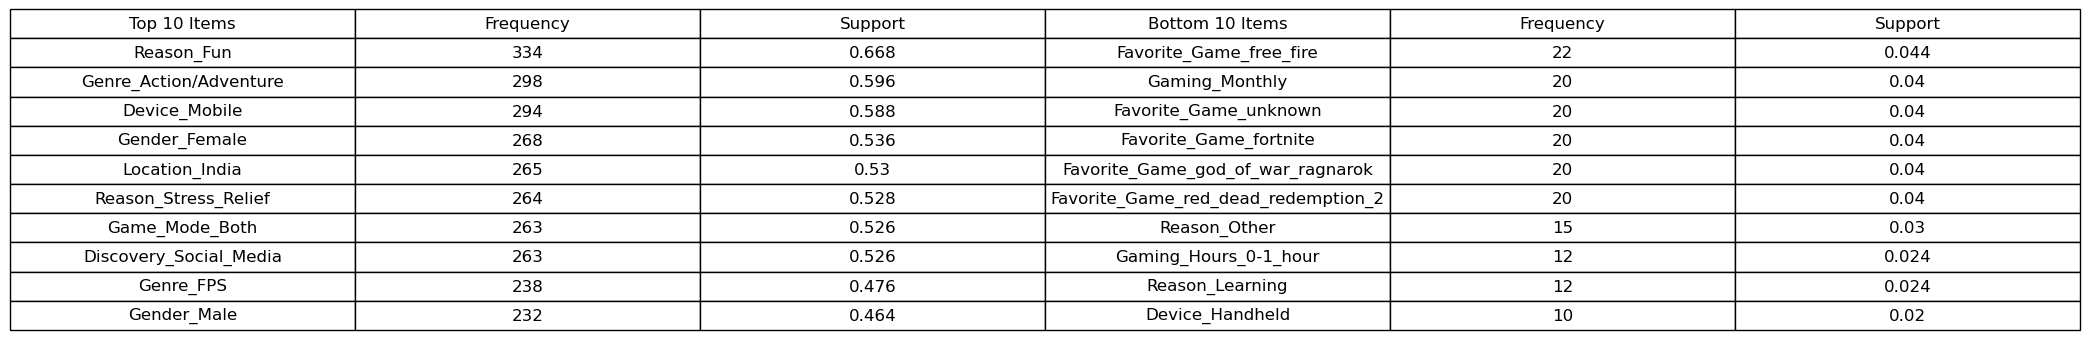

In [100]:
def get_item_supports(df: pd.DataFrame) -> pd.DataFrame:
    freq_support = pd.DataFrame({
        "Frequency": df.sum(),
        "Support": df.mean()
    }).sort_values("Frequency", ascending=False)

    top_10 = freq_support.head(10).reset_index()
    bottom_10 = freq_support.tail(10).reset_index()

    top_10.rename(columns={"index": "Top 10 Items"}, inplace=True)
    bottom_10.rename(columns={"index": "Bottom 10 Items"}, inplace=True)

    combined = pd.concat([top_10, bottom_10], axis=1)

    return freq_support, combined, top_10, bottom_10

freq_support, combined, top_10, bottom_10 = get_item_supports(df)

dataframe_to_png(combined, "data/item_support_table.png", figsize=(21, 3.5), show=True)

### Transaction lengths

$ \text{transaction length} = \sum_{j} X_{ij} $

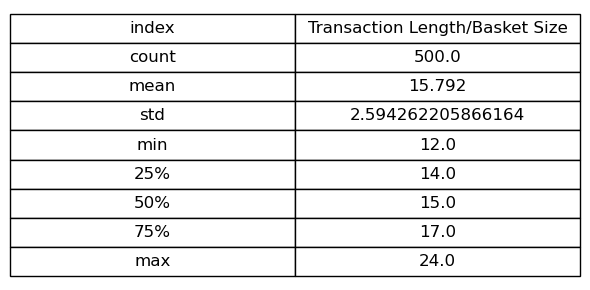

In [101]:
def get_transaction_lengths(df: pd.DataFrame) -> pd.Series:
    transaction_lengths = df.sum(axis=1)

    basket_size = transaction_lengths.describe().to_frame(name="Transaction Length/Basket Size")
    return basket_size

basket_size = get_transaction_lengths(df)
dataframe_to_png(basket_size, "data/transaction_length_summary.png", figsize=(6, 3), include_index=True)

### Sparsity/Density of the Dataset

$ \text{density} = \frac{\text{total ones}}{N \times M} $

In [102]:
def find_sparsity_density(df: pd.DataFrame, metric: str = "sparsity") -> float:

    total_entries = df.shape[0] * df.shape[1]
    total_ones = df.values.sum()

    density = (total_ones / total_entries)
    sparsity = 1 - density

    if metric == "sparsity":
        print("Sparsity:", sparsity)
        return sparsity
    elif metric == "density":
        print("Density:", density)
        return density

find_sparsity_density(df, metric="sparsity")
find_sparsity_density(df, metric="density")

Sparsity: 0.7607272727272727
Density: 0.23927272727272728


np.float64(0.23927272727272728)

### Sample Transactions

In [113]:
transaction_1 = get_transaction(df,0)
transaction_1_len = len(transaction_1)
print(f"Length: {transaction_1_len}\nItems: {transaction_1}")

Length: 14
Items: ['Age_Teen', 'Location_India', 'Gender_Male', 'Gaming_Daily', 'Gaming_Hours_10-20_hours', 'Device_Mobile', 'Genre_Sports', 'Favorite_Game_fc_mobile', 'Discovery_Social_Media', 'Discovery_Gaming_Forums', 'Game_Mode_Both', 'Spend_lt100', 'Reason_Fun', 'Reason_Stress_Relief']


In [115]:
transaction_5 = get_transaction(df,4)
transaction_5_len = len(transaction_5)
print(f"Length: {transaction_5_len}\nItems: {transaction_5}")

Length: 18
Items: ['Age_Teen', 'Location_India', 'Gender_Female', 'Gaming_Daily', 'Gaming_Hours_1-5_hours', 'Device_PC', 'Device_Mobile', 'Genre_Action/Adventure', 'Genre_FPS', 'Genre_RPG', 'Favorite_Game_solo_leveling', 'Discovery_Friends_Family', 'Game_Mode_Multiplayer', 'Spend_lt100', 'Reason_Fun', 'Reason_Stress_Relief', 'Reason_Skills_Competition', 'Reason_Socialize']


In [114]:
transaction_500 = get_transaction(df,499)
transaction_500_len = len(transaction_500)
print(f"Length: {transaction_500_len}\nItems: {transaction_500}")

Length: 16
Items: ['Age_Young_Adult', 'Location_Other', 'Gender_Female', 'Gaming_Daily', 'Gaming_Hours_10-20_hours', 'Device_Console', 'Genre_FPS', 'Genre_RPG', 'Genre_Simulation', 'Favorite_Game_call_of_duty', 'Discovery_Gaming_Forums', 'Discovery_YouTube_Streaming', 'Game_Mode_Multiplayer', 'Spend_lt100', 'Reason_Stress_Relief', 'Reason_Socialize']


In [117]:
print(df.columns.tolist())

['Age_Teen', 'Age_Young_Adult', 'Age_Adult', 'Age_Mid_Adult', 'Location_India', 'Location_US', 'Location_Other', 'Gender_Female', 'Gender_Male', 'Gaming_Daily', 'Gaming_Weekly', 'Gaming_Monthly', 'Gaming_Rarely_Never', 'Gaming_Hours_0-1_hour', 'Gaming_Hours_1-5_hours', 'Gaming_Hours_5-10_hours', 'Gaming_Hours_10-20_hours', 'Gaming_Hours_20plus_hours', 'Device_PC', 'Device_Mobile', 'Device_Console', 'Device_Handheld', 'Device_Tablet', 'Genre_Action/Adventure', 'Genre_FPS', 'Genre_RPG', 'Genre_Puzzle/Strategy', 'Genre_Simulation', 'Genre_MMO', 'Genre_Sports', 'Favorite_Game_bgmi', 'Favorite_Game_call_of_duty', 'Favorite_Game_chess', 'Favorite_Game_clash_of_clans', 'Favorite_Game_efootball', 'Favorite_Game_fc_mobile', 'Favorite_Game_fortnite', 'Favorite_Game_free_fire', 'Favorite_Game_god_of_war_ragnarok', 'Favorite_Game_moba_legends', 'Favorite_Game_red_dead_redemption_2', 'Favorite_Game_rhythm_rush_lite', 'Favorite_Game_solo_leveling', 'Favorite_Game_subway', 'Favorite_Game_wukong', 'Fa

#### Reducing the Sparsity

In [105]:
pruned_df, dropped = pp.prune_items_by_support(df, min_support=0.10)
find_sparsity_density(pruned_df, metric="sparsity")

Support threshold: 0.1
Items kept: 44
Items dropped: 22
Sparsity: 0.6674545454545455


np.float64(0.6674545454545455)